/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 94.55%


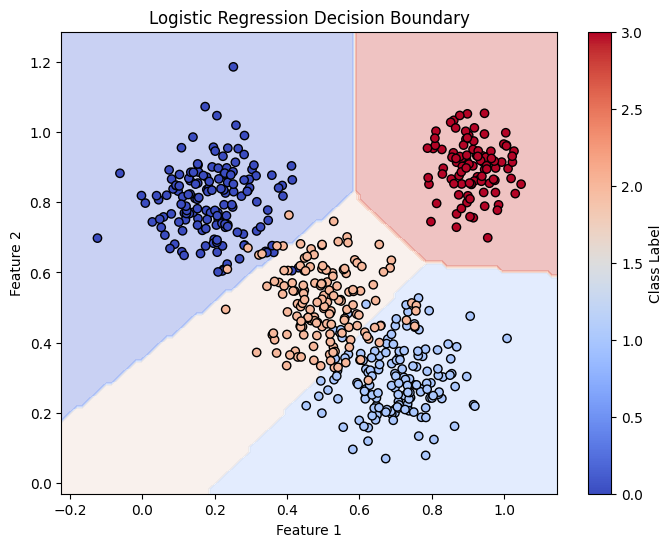

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Generate a multimodal dataset with multiple clusters
np.random.seed(42)
data1 = np.random.multivariate_normal(mean=[0.2, 0.8], cov=[[0.01, 0], [0, 0.01]], size=150)
data2 = np.random.multivariate_normal(mean=[0.7, 0.3], cov=[[0.01, 0], [0, 0.01]], size=150)
data3 = np.random.multivariate_normal(mean=[0.5, 0.5], cov=[[0.01, 0], [0, 0.01]], size=150)
data4 = np.random.multivariate_normal(mean=[0.9, 0.9], cov=[[0.005, 0], [0, 0.005]], size=100)
data = np.vstack([data1, data2, data3, data4])  # Merge all clusters
labels = np.concatenate([np.zeros(150), np.ones(150), np.full(150, 2), np.full(100, 3)])  # Assign class labels

# Step 2: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Step 3: Train Logistic Regression Model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)

# Step 4: Predict on the test set and compute accuracy
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

# Step 5: Visualize Decision Boundaries
x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = log_reg.predict(grid_points).reshape(xx.shape)

# Step 6: Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, alpha=0.3, cmap="coolwarm")
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="coolwarm", edgecolors="black", label="Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.colorbar(label="Class Label")
plt.show()


In [ ]:
predictions

array([[2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 3.]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from scipy.optimize import fmin_l_bfgs_b

In [ ]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate the data
X_data, y_data = make_classification(n_samples=1000, n_features=2, n_classes=2,
                           n_clusters_per_class=2, n_redundant=0, random_state=42)

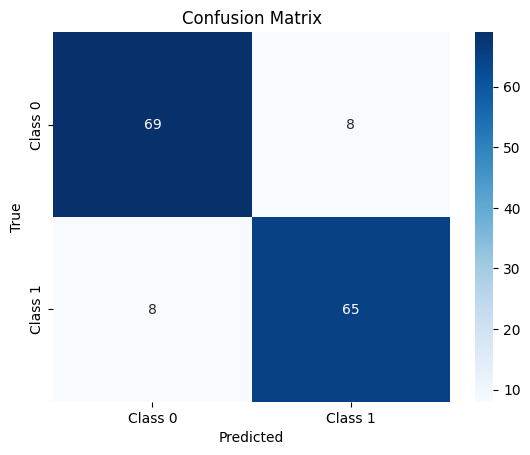

In [ ]:
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size=0.15, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Step 4: Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# X_data, y_data = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

In [ ]:
# X_data = 1 / (1 + np.exp(-X_data))

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_function(X, y, theta):
    h = sigmoid(X @ theta)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

def logistic_loss(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    loss = (-y @ np.log(h + 1e-10) - (1 - y) @ np.log(1 - h + 1e-10)) / m  # Scalar loss
    gradient = X.T @ (h - y) / m  # Gradient vector
    return loss, gradient  # ✅ Ensures loss is scalar and gradient is vector

# With sign momentum

In [ ]:
import numpy as np
from scipy.optimize import fmin_l_bfgs_b

def gradient_descent(theta, X, y, epochs, alpha=0.05, momentum=0.9):
    """Gradient descent with momentum."""
    theta_history = [theta.copy()]
    loss_history = []
    v = np.zeros_like(theta)  # ✅ Fix: Use vector instead of scalar

    for _ in range(epochs):
        loss, gradient = logistic_loss(theta, X, y)  # ✅ Correct way to get loss & gradient
        v = momentum * v + (1 - momentum) * gradient  # ✅ Fix: Ensure v is vector
        theta -= alpha * np.sign(v)  # Update theta

        loss_history.append(loss)
        theta_history.append(theta.copy())  # Store copy to avoid mutation issues

    return np.array(theta_history), np.array(loss_history)


In [ ]:
theta = np.random.randn(X.shape[1])

# ✅ Run gradient descent
theta_history, loss_history = gradient_descent(theta, X, y, epochs=5000)

# ✅ Optimize using L-BFGS-B
theta_opt, fmin_value, _ = fmin_l_bfgs_b(logistic_loss, theta, args=(X, y), approx_grad=False)

print("Final Theta from Gradient Descent:", theta_history[-1])
print("Optimal Theta from L-BFGS-B:", theta_opt)
print("Minimum Loss Value from L-BFGS-B:", fmin_value)

Final Theta from Gradient Descent: [-0.42381056  2.89942927]
Optimal Theta from L-BFGS-B: [-0.43765183  2.91558322]
Minimum Loss Value from L-BFGS-B: 0.3426335665434912


### LBFGS 10x faster than gradient descent, Both reach minimal loss state for paramters.

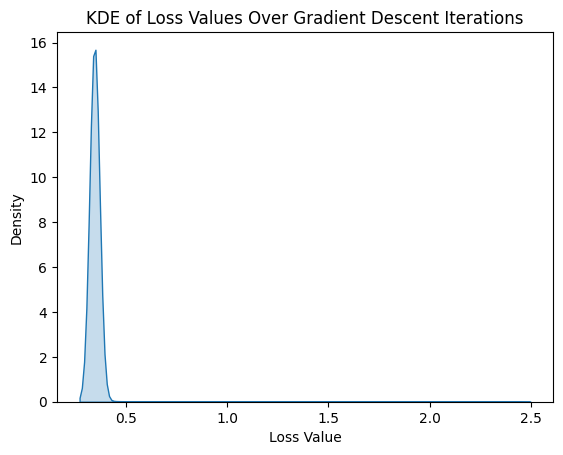

In [ ]:

sns.kdeplot(loss_history, fill=True)
plt.xlabel("Loss Value")
plt.ylabel("Density")
plt.title("KDE of Loss Values Over Gradient Descent Iterations")
plt.show()


In [ ]:
# Sharp Peak at ~0.35
#     The optimizer has converged to a single region in the loss landscape.
#     There is little variation in loss values, meaning updates are small or the optimizer is stuck.

# No Wide Spread
#     The optimizer did not explore much, indicating either:
#         It found a stable local/global minimum.
#         Learning rate is small, preventing large updates.

# No Multiple Peaks
#     If there were multiple peaks, it would indicate multiple local minima being visited.
#     Here, only one sharp peak suggests stability but not necessarily a global minimum.

In [ ]:
theta_history[:, 0]

array([ 0.99801011,  0.94801011,  0.89801011, ..., -0.50198989,
       -0.55198989, -0.50198989])

In [ ]:
theta0_range = np.linspace(-5, 5, 100)
theta1_range = np.linspace(-5, 5, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)

theta2 = 0
loss_surface = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta = np.array([theta0_grid[i, j], theta1_grid[i, j]])
        loss_surface[i, j] = loss_function(X, y, theta)

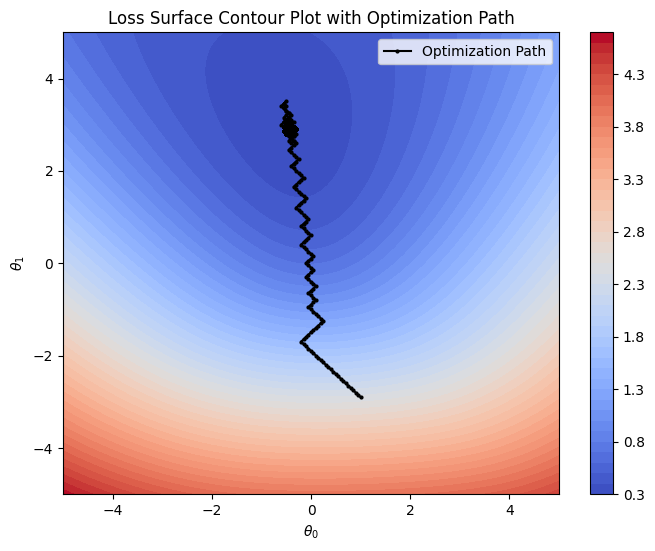

In [ ]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(theta0_grid, theta1_grid, loss_surface, levels=50, cmap="coolwarm")
plt.colorbar(contour)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title("Loss Surface Contour Plot with Optimization Path")

plt.plot(theta_history[:, 0], theta_history[:, 1], marker="o", markersize=2, color="black", linestyle="-", label="Optimization Path")

plt.legend()
plt.show()


In [ ]:
import time

theta_init = np.random.randn(X.shape[1])

# Measure the time for Gradient Descent
start_time = time.time()
theta_history, loss_history = gradient_descent(theta_init, X, y, epochs=2000)
gd_time = time.time() - start_time
print(f"Gradient Descent Time: {gd_time:.4f} seconds")

# Measure the time for LBFGS
start_time = time.time()
theta_opt, fmin_value, _ = fmin_l_bfgs_b(logistic_loss, theta_init, args=(X, y))
lbfgs_time = time.time() - start_time
print(f"LBFGS Time: {lbfgs_time:.4f} seconds")

# Results: comparing final theta values and time
print(f"Final theta from Gradient Descent: {theta_history[-1]}")
print(f"Final theta from LBFGS: {theta_opt}")


Gradient Descent Time: 0.1653 seconds
LBFGS Time: 0.0016 seconds
Final theta from Gradient Descent: [-0.43050608  2.95196723]
Final theta from LBFGS: [-0.43761802  2.91558181]


In [ ]:
theta_history[-1]

array([-0.5116253 ,  2.96041037])

In [ ]:
fig = go.Figure(data=[go.Surface(
    z=loss_surface,
    x=theta0_grid,
    y=theta1_grid,
    colorscale='Viridis'
)])

fig.add_trace(go.Scatter3d(
    x=theta_history[:, 0],
    y=theta_history[:, 1],
    z=[loss_function(X, y, theta) for theta in theta_history],
    mode='lines+markers',
    marker=dict(size=5, color='red'),
    line=dict(color='red', width=3)
))

fig.update_layout(
    title='3D Visualization of the Loss Surface',
    scene=dict(
        xaxis_title='Theta[0]',
        yaxis_title='Theta[1]',
        zaxis_title='Loss'
    ),
    autosize=False,
    width=800,
    height=800
)

fig.show()

In [ ]:
theta_history[-1]

array([-0.5116253 ,  2.96041037])

In [ ]:
# Loss function smoothening

Accuracy: 0.8800
Confusion Matrix:
[[69  8]
 [10 63]]


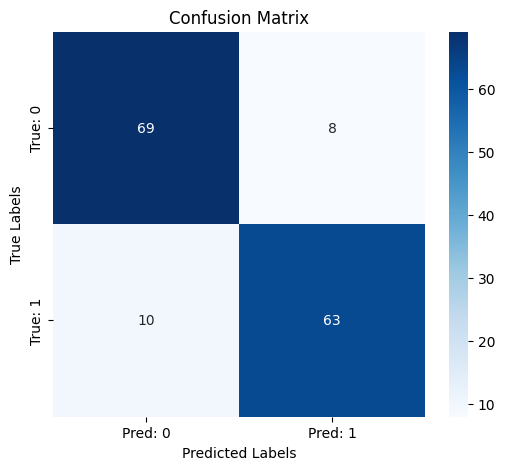

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

final_theta = theta_history[-1]

predictions = sigmoid(X_test @ final_theta)
predicted_labels = (predictions >= 0.5).astype(int)
accuracy = accuracy_score(y_test, predicted_labels)

cm = confusion_matrix(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
a = np.array([np.array([1, 3, 4]), np.array([3, 4, 1])])
re = a[0] @ a[1]

In [ ]:
re

19

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the loss function (logistic loss)
def loss_function(X, y, theta):
    h = sigmoid(X @ theta)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradient descent function to track the path
def gradient_descent(X, y, alpha, epochs):
    theta = np.random.randn(3)
    theta_history = [theta.copy()]
    loss_history = []

    for _ in range(epochs):
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / len(y)
        theta -= alpha * gradient
        theta_history.append(theta.copy())
        loss_history.append(loss_function(X, y, theta))

    return np.array(theta_history), loss_history

# Example data (for illustration purposes, replace this with actual data)
X = np.random.randn(100, 3)  # 100 samples, 3 features
y = (np.random.randn(100) > 0).astype(int)  # Binary labels

# Parameters
alpha = 0.1
epochs = 100

# Run gradient descent
theta_history, loss_history = gradient_descent(X, y, alpha, epochs)

# Generate a meshgrid for theta[0] and theta[1] for visualization
theta0_range = np.linspace(-3, 3, 100)
theta1_range = np.linspace(-3, 3, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)

# Initialize theta2 to a constant value for simplicity
theta2 = 0

# Compute the loss surface for each combination of theta[0] and theta[1]
loss_surface = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta = np.array([theta0_grid[i, j], theta1_grid[i, j], theta2])
        loss_surface[i, j] = loss_function(X, y, theta)

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(
    z=loss_surface,
    x=theta0_grid,
    y=theta1_grid,
    colorscale='Viridis',
    opacity=0.8
)])

# Add gradient descent path
theta_history = np.array(theta_history)
fig.add_trace(go.Scatter3d(
    x=theta_history[:, 0],
    y=theta_history[:, 1],
    z=[loss_function(X, y, theta) for theta in theta_history],
    mode='lines+markers',
    marker=dict(size=5, color='red'),
    line=dict(color='red', width=3)
))

# Mark the global minimum (assuming we know it or can estimate it)
# For simplicity, we will assume the global minimum is at the center of the range
# This is just for visualization and doesn't reflect the actual global minimum in a real problem
global_minima = np.array([0, 0, 0])  # Placeholder for the actual global minimum
global_minima_loss = loss_function(X, y, global_minima)

# Add the global minimum marker
fig.add_trace(go.Scatter3d(
    x=[global_minima[0]],
    y=[global_minima[1]],
    z=[global_minima_loss],
    mode='markers',
    marker=dict(size=10, color='green', symbol='diamond'),
    name='Global Minimum'
))

# Set the axis labels and title
fig.update_layout(
    title='3D Loss Surface with Gradient Descent Path and Global Minimum',
    scene=dict(
        xaxis_title='Theta[0]',
        yaxis_title='Theta[1]',
        zaxis_title='Loss'
    ),
    autosize=False,
    width=800,
    height=800
)

# Show the plot
fig.show()


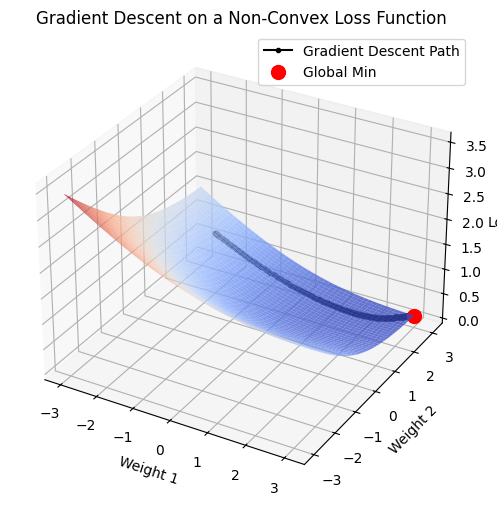

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Custom non-convex loss function
def non_convex_loss(w1, w2, X, y, lam=0.5):
    z = X[:, 0] * w1 + X[:, 1] * w2
    y_pred = sigmoid(z)

    # Standard Binary Cross-Entropy Loss
    bce_loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))

    # Adding non-convexity with sinusoidal terms
    # non_convex_term = lam * np.sin(5 * w1) * np.sin(5 * w2)

    return bce_loss

# Compute gradients
def compute_gradient(w1, w2, X, y, lam=0.5):
    epsilon = 1e-5
    grad_w1 = (non_convex_loss(w1 + epsilon, w2, X, y, lam) - non_convex_loss(w1 - epsilon, w2, X, y, lam)) / (2 * epsilon)
    grad_w2 = (non_convex_loss(w1, w2 + epsilon, X, y, lam) - non_convex_loss(w1, w2 - epsilon, X, y, lam)) / (2 * epsilon)
    return np.array([grad_w1, grad_w2])

# Gradient Descent Simulation
def gradient_descent(w_init, X, y, lr=0.1, steps=50, lam=0.5):
    path = [w_init]
    w = np.array(w_init)
    v = 0
    m = 0.95
    for _ in range(steps):
        grad = compute_gradient(w[0], w[1], X, y, lam)
        v = m*v + lr*grad
        w = w - v
        # w = w - lr * grad
        path.append(w)

    return np.array(path)

# Generate synthetic dataset
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary labels

# Define weight range for visualization
w1_range = np.linspace(-3, 3, 50)
w2_range = np.linspace(-3, 3, 50)
W1, W2 = np.meshgrid(w1_range, w2_range)

# Compute loss values
Loss = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Loss[i, j] = non_convex_loss(W1[i, j], W2[i, j], X, y)

# Run Gradient Descent
start_point = (-2, 2)  # Initial weight values
path = gradient_descent(start_point, X, y, lr=0.01, steps=250)

# Plot Loss Surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Loss, cmap='coolwarm', alpha=0.8)

# Plot Gradient Descent Path
ax.plot(path[:, 0], path[:, 1], [non_convex_loss(w[0], w[1], X, y) for w in path],
        color='black', marker='o', markersize=3, label="Gradient Descent Path")

# Mark Global Minimum (for visualization)
min_index = np.unravel_index(np.argmin(Loss, axis=None), Loss.shape)
global_min = (w1_range[min_index[0]], w2_range[min_index[1]])
ax.scatter(global_min[0], global_min[1], np.min(Loss), color='red', s=100, label="Global Min")

# Labels
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Loss')
ax.set_title('Gradient Descent on a Non-Convex Loss Function')
ax.legend()

plt.show()


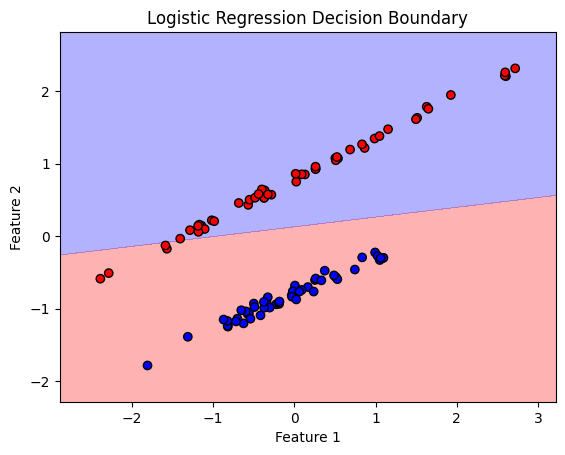

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term (X0 = 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize weights
theta = np.random.randn(3)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
alpha = 0.1  # Learning rate
epochs = 100
theta_history = [theta.copy()]

for _ in range(epochs):
    h = sigmoid(X @ theta)
    gradient = X.T @ (h - y) / len(y)
    theta -= alpha * gradient
    theta_history.append(theta.copy())

# Function to plot decision boundary
def plot_decision_boundary(theta, X, y):
    x_min, x_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    y_min, y_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ theta).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.3)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot final decision boundary
plot_decision_boundary(theta, X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



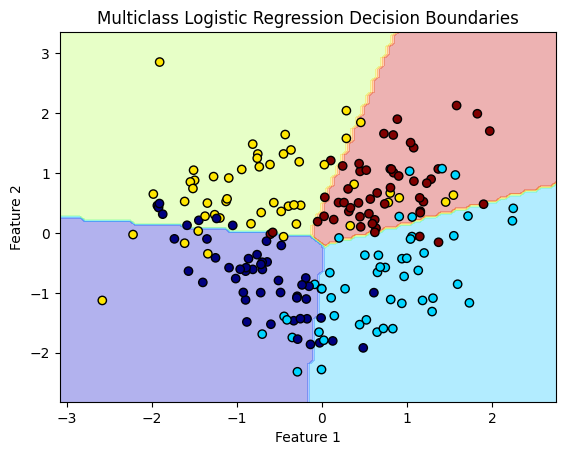

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Generate synthetic dataset with 4 classes
np.random.seed(42)
X, y = make_classification(n_samples=200, n_features=2, n_classes=4, n_clusters_per_class=1, n_redundant=0)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train multinomial logistic regression (softmax regression)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Plot decision boundary function
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict class for each grid point
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.jet)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.jet)
    plt.title("Multiclass Logistic Regression Decision Boundaries")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X, y)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=100, n_features=2, n_classes=4, n_clusters_per_class=1, n_redundant=0)
scaler = StandardScaler()
X = scaler.fit_transform(X)

num_classes = 4
num_features = X.shape[1]
theta = np.random.randn(num_classes, num_features + 1)  # (4, 3)

X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

y_onehot = np.eye(num_classes)[y]

alpha = 0.1
epochs = 100
loss_history = []

theta_history = [theta.copy()]
for _ in range(epochs):
    logits = X_bias @ theta.T
    probs = softmax(logits)
    loss = cross_entropy_loss(y_onehot, probs)
    loss_history.append(loss)

    gradient = (1 / X.shape[0]) * ((probs - y_onehot).T @ X_bias)
    theta -= alpha * gradient
    theta_history.append(theta.copy())

loss_history = np.array(loss_history)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation

# Data Generation (4 classes)
num_classes = 4
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_classes=num_classes,
    n_clusters_per_class=1,
    n_redundant=0,
    n_informative=2,
    random_state=42
)

# Standardizing Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

num_features = X.shape[1]
theta = np.random.randn(num_classes, num_features + 1)  # Shape: (4,3)

# Add Bias Term
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

# Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-Entropy Loss for Multi-Class
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Convert labels to one-hot encoding
y_onehot = np.eye(num_classes)[y]  # Shape: (200, 4)

# Training Parameters
alpha = 0.1
epochs = 100
loss_history = []
theta_history = [theta.copy()]

# Training Loop
for _ in range(epochs):
    logits = X_bias @ theta.T
    probs = softmax(logits)  # Shape: (200, 4)
    loss = mse_loss(y_onehot, probs)
    loss_history.append(loss)

    gradient = (1 / X.shape[0]) * ((probs - y_onehot).T @ X_bias)
    theta -= alpha * gradient
    theta_history.append(theta.copy())

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Function to Plot Decision Boundaries
def plot_decision_boundary(theta, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = softmax(np.hstack((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()])) @ theta.T)
    Z = np.argmax(Z, axis=1).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Animation Update Function
def update(frame):
    ax.clear()
    plot_decision_boundary(theta_history[frame], ax)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    ax.set_title(f"Epoch {frame + 1}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

ani = FuncAnimation(fig, update, frames=len(theta_history), interval=50)
plt.close()


In [ ]:
HTML(ani.to_html5_video())

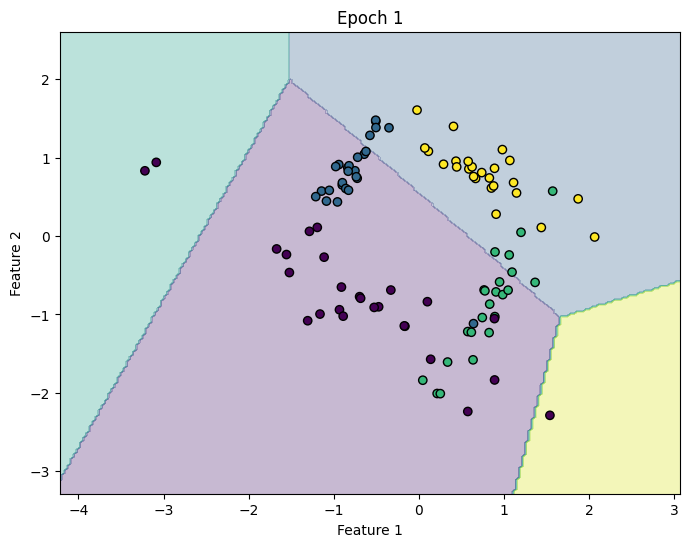

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Data generation and preprocessing
X, y = make_classification(n_samples=100, n_features=2, n_classes=4, n_clusters_per_class=1, n_redundant=0)
scaler = StandardScaler()
X = scaler.fit_transform(X)

num_classes = 4
num_features = X.shape[1]
theta = np.random.randn(num_classes, num_features + 1)  # (4, 3)

X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

y_onehot = np.eye(num_classes)[y]

alpha = 0.1
epochs = 100
loss_history = []

theta_history = [theta.copy()]
for _ in range(epochs):
    logits = X_bias @ theta.T
    probs = softmax(logits)
    loss = cross_entropy_loss(y_onehot, probs)
    loss_history.append(loss)

    gradient = (1 / X.shape[0]) * ((probs - y_onehot).T @ X_bias)
    theta -= alpha * gradient
    theta_history.append(theta.copy())

# Plotting and animation
fig, ax = plt.subplots(figsize=(8, 6))

# Set up scatter plot for data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

# Define a function to plot the decision boundary
def plot_decision_boundary(theta, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = np.argmax(softmax(np.hstack((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()])) @ theta.T), axis=1)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

def update(frame):
    ax.clear()
    plot_decision_boundary(theta_history[frame], ax)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    ax.set_title(f"Epoch {frame + 1}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(theta_history)), interval=50)
HTML(ani.to_html5_video())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Data generation and preprocessing
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    n_informative=2  # Ensure there are two informative features
)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
num_classes = 2
num_features = X.shape[1]
theta = np.random.randn(num_classes, num_features + 1)  # (2, 3)

X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


y_onehot = np.eye(num_classes)[y]

alpha = 0.1
epochs = 100
loss_history = []

theta_history = [theta.copy()]
for _ in range(epochs):
    logits = X_bias @ theta.T
    probs = sigmoid(logits)[:, 1]  # Only take probabilities for class 1
    loss = cross_entropy_loss(y, probs)
    loss_history.append(loss)

    gradient = (1 / X.shape[0]) * ((probs - y)[:, np.newaxis].T @ X_bias)
    theta[1] -= alpha * gradient.flatten()
    theta_history.append(theta.copy())

# Plotting and animation
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

# Define a function to plot the decision boundary
def plot_decision_boundary(theta, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = sigmoid(np.hstack((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()])) @ theta[1])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap='viridis')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

def update(frame):
    ax.clear()
    plot_decision_boundary(theta_history[frame], ax)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    ax.set_title(f"Epoch {frame + 1}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

ani = FuncAnimation(fig, update, frames=range(len(theta_history)), interval=50)
plt.close()

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Data generation and preprocessing
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    n_informative=2  # Ensure there are two informative features
)
scaler = StandardScaler()
X = scaler.fit_transform(X)

num_classes = 2
num_features = X.shape[1]
theta = np.random.randn(num_features + 1)  # (3,)

X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

alpha = 0.1

epochs = 100
loss_history = []
theta_history = [theta.copy()]

for _ in range(epochs):
    logits = X_bias @ theta
    probs = sigmoid(logits)  # Probability for class 1
    loss = mse_loss(y, probs)
    loss_history.append(loss)

    gradient = (1 / X.shape[0]) * (X_bias.T @ (probs - y))
    theta -= alpha * gradient
    theta_history.append(theta.copy())

# Generate loss landscape
T1, T2 = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
loss_values = np.zeros_like(T1)

for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        test_theta = np.array([0, T1[i, j], T2[i, j]])
        logits = X_bias @ test_theta
        probs = sigmoid(logits)
        loss_values[i, j] = cross_entropy_loss(y, probs)

# Plot Loss Surface
fig = go.Figure()
fig.add_trace(go.Surface(z=loss_values, x=T1, y=T2, colorscale='Viridis', opacity=0.7))

# Plot Optimization Path
theta1_vals = [t[1] for t in theta_history]
theta2_vals = [t[2] for t in theta_history]
loss_vals = [cross_entropy_loss(y, sigmoid(X_bias @ t)) for t in theta_history]

fig.add_trace(go.Scatter3d(x=theta1_vals, y=theta2_vals, z=loss_vals,
                           mode='lines+markers', marker=dict(size=5, color='red'),
                           name='Optimization Path'))

fig.update_layout(title='Loss Landscape and Optimization Path',
                  scene=dict(xaxis_title='Theta1', yaxis_title='Theta2', zaxis_title='Loss'))
fig.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Data generation and preprocessing
X, y = make_classification(
    n_samples=200,  # More samples for 4 classes
    n_features=2,
    n_classes=4,
    n_clusters_per_class=1,
    n_redundant=0,
    n_informative=2
)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels for categorical cross-entropy
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))  # Shape: (200, 4)

num_classes = 4
num_features = X.shape[1]

# Initialize weights (theta) randomly for 4-class classification
theta = np.random.randn(num_features + 1, num_classes)  # Shape: (3, 4)

# Add bias term
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Shape: (200, 3)

# Softmax function for multi-class classification
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Categorical Cross-Entropy Loss
def categorical_cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

alpha = 0.1  # Learning rate
epochs = 100
loss_history = []
theta_history = [theta.copy()]

# Training loop with Gradient Descent
for _ in range(epochs):
    logits = X_bias @ theta  # Shape: (200, 4)
    probs = softmax(logits)  # Shape: (200, 4)
    loss = categorical_cross_entropy_loss(y_onehot, probs)
    loss_history.append(loss)

    gradient = (1 / X.shape[0]) * (X_bias.T @ (probs - y_onehot))  # Gradient for softmax
    theta -= alpha * gradient
    theta_history.append(theta.copy())

# Generate loss landscape for visualization
T1, T2 = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
loss_values = np.zeros_like(T1)

for i in range(T1.shape[0]):
    for j in range(T1.shape[1]):
        test_theta = np.vstack([
            np.zeros((1, 4)),  # Bias terms (row of zeros)
            np.full((1, 4), T1[i, j]),  # First feature's weights
            np.full((1, 4), T2[i, j])   # Second feature's weights
        ])

        logits = X_bias @ test_theta
        probs = softmax(logits)
        loss_values[i, j] = categorical_cross_entropy_loss(y_onehot, probs)

# Plot Loss Surface
fig = go.Figure()
fig.add_trace(go.Surface(z=loss_values, x=T1, y=T2, colorscale='Viridis', opacity=0.7))

# Plot Optimization Path
theta1_vals = [t[1, 0] for t in theta_history]
theta2_vals = [t[2, 0] for t in theta_history]
loss_vals = [categorical_cross_entropy_loss(y_onehot, softmax(X_bias @ t)) for t in theta_history]

fig.add_trace(go.Scatter3d(x=theta1_vals, y=theta2_vals, z=loss_vals,
                           mode='lines+markers', marker=dict(size=5, color='red'),
                           name='Optimization Path'))

fig.update_layout(title='Loss Landscape and Optimization Path for 4-Class Classification',
                  scene=dict(xaxis_title='Theta1', yaxis_title='Theta2', zaxis_title='Loss'))
fig.show()


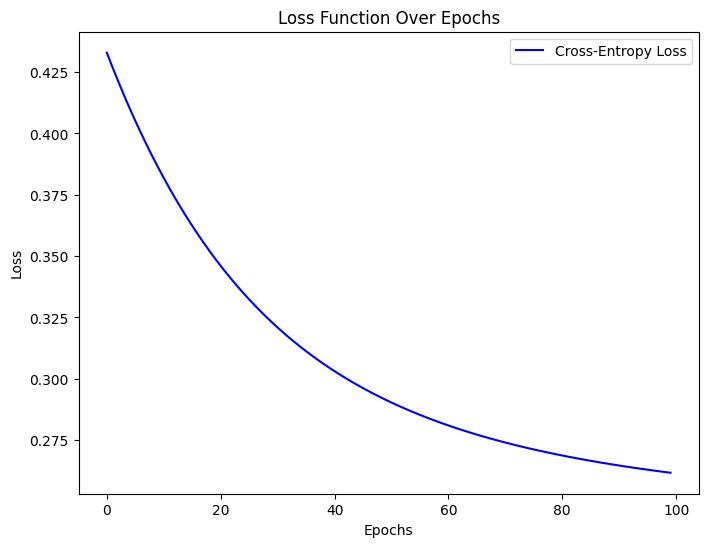

In [ ]:
# Plot Loss Function
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), loss_history, label='Cross-Entropy Loss', color='b')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Function Over Epochs")
plt.legend()
plt.show()

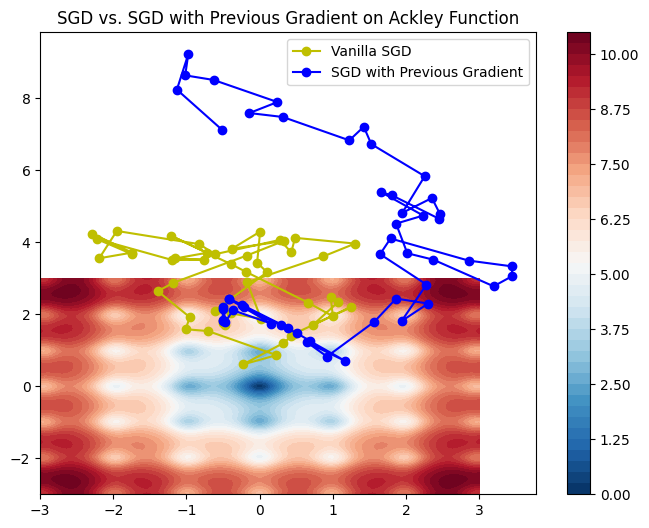

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ackley function
def ackley(x, y):
    a, b, c = 20, 0.2, 2 * np.pi
    return -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(c * x) + np.cos(c * y))) + a + np.exp(1)

# Gradient of Ackley function
def ackley_grad(x, y):
    a, b, c = 20, 0.2, 2 * np.pi
    exp1 = np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    exp2 = np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))

    grad_x = (b * x * exp1) / (np.sqrt(0.5 * (x**2 + y**2))) + c * np.sin(c * x) * exp2
    grad_y = (b * y * exp1) / (np.sqrt(0.5 * (x**2 + y**2))) + c * np.sin(c * y) * exp2
    return np.array([grad_x, grad_y])

# Initialize parameters
np.random.seed(42)
x_sgd, y_sgd = np.random.uniform(-2, 2), np.random.uniform(-2, 2)
x_sgd_prev, y_sgd_prev = x_sgd, y_sgd

# Learning rate and iterations
lr = 0.1
iterations = 50
previous_grad = np.array([0.0, 0.0])
decay = 0.2  # Weight for previous gradient

# Store paths
path_sgd = [(x_sgd, y_sgd)]
path_sgd_prev = [(x_sgd_prev, y_sgd_prev)]

for _ in range(iterations):
    grad = ackley_grad(x_sgd, y_sgd)
    x_sgd, y_sgd = x_sgd - lr * grad[0], y_sgd - lr * grad[1]
    path_sgd.append((x_sgd, y_sgd))

    # Using previous gradient
    grad_prev = ackley_grad(x_sgd_prev, y_sgd_prev)
    update = grad_prev + decay * previous_grad
    x_sgd_prev, y_sgd_prev = x_sgd_prev - lr * update[0], y_sgd_prev - lr * update[1]
    previous_grad = grad_prev
    path_sgd_prev.append((x_sgd_prev, y_sgd_prev))

# Generate contour plot of Ackley function
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = ackley(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="RdBu_r")
plt.colorbar()

# Plot optimization paths
path_sgd = np.array(path_sgd)
path_sgd_prev = np.array(path_sgd_prev)

plt.plot(path_sgd[:, 0], path_sgd[:, 1], "y-o", label="Vanilla SGD")
plt.plot(path_sgd_prev[:, 0], path_sgd_prev[:, 1], "b-o", label="SGD with Previous Gradient")

plt.legend()
plt.title("SGD vs. SGD with Previous Gradient on Ackley Function")
plt.show()
